# Exercises I
Let's review the steps we take at the beginning of each new module.

1. Create a new repository named ```regression-exercises``` in your GitHub; all of your Regression work will be housed here.
1. Clone this repository within your local ```codeup-data-science``` directory.
1. Create a .gitignore and make sure your list of 'files to ignore' includes your ```env.py``` file.
1. Create a ```README.md``` file that outlines the contents and purpose of your repository.
1. Add, commit, and push these two files.
1. Now you can add your env.py file to this repository to access the Codeup database server.
1. For these exercises, you will create ```wrangle.ipynb``` and ```wrangle.py``` files to hold necessary functions.
1. As always, add, commit, and push your work often.


# Exercises II

Let's set up an example scenario as perspective for our regression exercises using the Zillow dataset.

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the obervations from 2017.

In these exercises, you will complete the first step toward the above goal: acquire and prepare the necessary Zillow data from the zillow database in the Codeup database server.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import wrangle as w

### 1. Acquire ```bedroomcnt```, ```bathroomcnt```, ```calculatedfinishedsquarefeet```, ```taxvaluedollarcnt```, ```yearbuilt```, ```taxamount```, and ```fips``` from the ```zillow``` database for all 'Single Family Residential' properties.


In [6]:
def new_zillow_data():
    '''
    This function reads the telco data from the Codeup db into a df.
    '''
    # Create SQL query.
    sql_query = '''
                SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips, propertylandusetypeid
                FROM properties_2017
                WHERE propertylandusetypeid IN ("261", "279");
                '''
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, w.get_db_url(db = 'zillow'))
    
    return df

In [3]:
def aquire_zillow_data(new = False):
    ''' Aquires data for 2017 properties '''
    
    filename = 'zillow.csv'
    
    #if we don't have cached data or we want to get new data go get it from server
    if (os.path.isfile(filename) == False) or (new == True):
        df = new_zillow_data()
        #save as csv
        df.to_csv(filename,index=False)

    #else used cached data
    else:
        df = pd.read_csv(filename)
          
    return df

In [7]:
#acquire data
zillow = aquire_zillow_data(new=True)

In [8]:
zillow.shape

(2152864, 8)

### 2. Using your acquired Zillow data, walk through the summarization and cleaning steps in your ```wrangle.ipynb``` file like we did above. You may handle the missing values however you feel is appropriate and meaningful; remember to document your process and decisions using markdown and code commenting where helpful.

## Examine data frame

In [5]:
zillow.shape

(2152863, 7)

In [6]:
zillow.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [7]:
zillow.info(null_counts =True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2152852 non-null  float64
 1   bathroomcnt                   2152852 non-null  float64
 2   calculatedfinishedsquarefeet  2144379 non-null  float64
 3   taxvaluedollarcnt             2152370 non-null  float64
 4   yearbuilt                     2143526 non-null  float64
 5   taxamount                     2148421 non-null  float64
 6   fips                          2152863 non-null  float64
dtypes: float64(7)
memory usage: 115.0 MB


In [11]:
#make column names more human readable
zillow = zillow.rename(columns = {'bedroomcnt':'bedrooms', 
                          'bathroomcnt':'bathrooms', 
                          'calculatedfinishedsquarefeet':'square_feet',
                          'taxvaluedollarcnt':'tax_value', 
                          'yearbuilt':'year_built'})

In [9]:
#statistical analysis of data
zillow.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,2152852.0,3.287196,0.954754,0.00,3.00,3.00,4.00,25.00
bathrooms,2152852.0,2.230688,0.999280,0.00,2.00,2.00,3.00,32.00
square_feet,2144379.0,1862.855178,1222.125124,1.00,1257.00,1623.00,2208.00,952576.00
tax_value,2152370.0,461896.237963,699676.049600,1.00,188170.25,327671.00,534527.00,98428909.00
year_built,2143526.0,1960.949681,22.162196,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2148421.0,5634.865978,8178.910249,1.85,2534.98,4108.95,6414.32,1337755.86
fips,2152863.0,6048.377335,20.433292,6037.00,6037.00,6037.00,6059.00,6111.00


In [10]:
#check for nulls in each column
zillow.isnull().sum()

bedrooms         11
bathrooms        11
square_feet    8484
tax_value       493
year_built     9337
taxamount      4442
fips              0
dtype: int64

**Thoughts**
- Need to figure out what to do with these NULLs
- And check if fips is no NULLs or just white space

In [11]:
#check to see what values exist in the fips column
zillow.fips.value_counts(dropna=False, ascending=True)

6111.0     165975
6059.0     555077
6037.0    1431811
Name: fips, dtype: int64

### Let's explore the data before we make any decisions

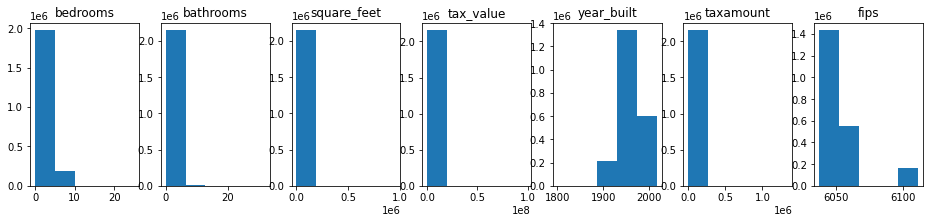

In [12]:
plt.figure(figsize=(16, 3))

# List of columns
cols = zillow.columns.to_list()

for i, col in enumerate(cols):

    # i starts at 0, but plot numbers should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1,7, plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    zillow[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)


All of the data seems skewed

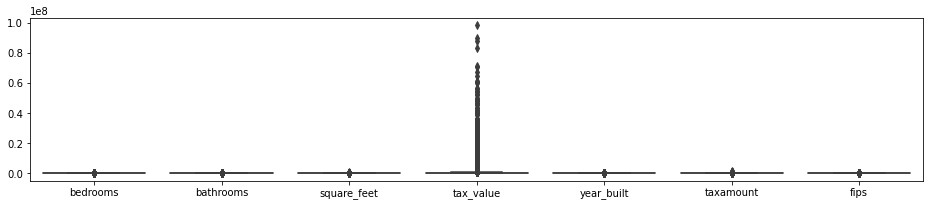

In [13]:
# Create boxplots for all the data
plt.figure(figsize=(16, 3))
sns.boxplot(data=zillow)
plt.show()

***DANG!*** There are some crazy outliers in ```tax_value```

In [14]:
# Look at the statistics again
zillow.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,2152852.0,3.287196,0.954754,0.00,3.00,3.00,4.00,25.00
bathrooms,2152852.0,2.230688,0.999280,0.00,2.00,2.00,3.00,32.00
square_feet,2144379.0,1862.855178,1222.125124,1.00,1257.00,1623.00,2208.00,952576.00
tax_value,2152370.0,461896.237963,699676.049600,1.00,188170.25,327671.00,534527.00,98428909.00
year_built,2143526.0,1960.949681,22.162196,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2148421.0,5634.865978,8178.910249,1.85,2534.98,4108.95,6414.32,1337755.86
fips,2152863.0,6048.377335,20.433292,6037.00,6037.00,6037.00,6059.00,6111.00


**Thoughts**
- obvious outliers in ```tax_value``` and ```taxamount```
- also looks like ```bedrooms``` and ```bathrooms``` has a few outliers as well 25 bedrooms??? 32 bathrooms???
- maybe a few outliers in ```square_feet```
- What should we do?!?!?

## Let's remove some outliers!

After some googling I saw a way to remove outliers with a cool function. (See below)

In [21]:
def remove_outliers(df, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:

        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + 1.5 * iqr   # get upper bound
        lower_bound = q1 - 1.5 * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

In [22]:
df = remove_outliers(zillow, ['bedrooms','bathrooms',
                         'square_feet', 'tax_value', 'taxamount'])




In [12]:
df = remove_outliers(zillow, 1.5, ['tax_value', 
                                   'taxamount', 'bedrooms', 
                                   'bathrooms', 
                                   'square_feet'])

In [23]:
zillow.shape, df.shape

((2152864, 8), (1855285, 8))

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1423123 entries, 7 to 2152861
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   bedrooms     1423123 non-null  float64
 1   bathrooms    1423123 non-null  float64
 2   square_feet  1423123 non-null  float64
 3   tax_value    1423123 non-null  float64
 4   year_built   1422573 non-null  float64
 5   taxamount    1423123 non-null  float64
 6   fips         1423123 non-null  float64
dtypes: float64(7)
memory usage: 86.9 MB


In [19]:
#check for nulls in each column
df.isnull().sum()

bedrooms         0
bathrooms        0
square_feet      0
tax_value        0
year_built     550
taxamount        0
fips             0
dtype: int64

In [14]:
#drop the nulls
df1 = zillow.dropna()

In [15]:
zillow.shape, df.shape, df1.shape

((2152864, 8), (1423123, 8), (2140235, 8))

In [22]:
df.shape

(1423123, 7)

In [23]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1423123 entries, 7 to 2152861
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   bedrooms     1423123 non-null  float64
 1   bathrooms    1423123 non-null  float64
 2   square_feet  1423123 non-null  float64
 3   tax_value    1423123 non-null  float64
 4   year_built   1422573 non-null  float64
 5   taxamount    1423123 non-null  float64
 6   fips         1423123 non-null  float64
dtypes: float64(7)
memory usage: 86.9 MB


In [24]:
def wrangle_zillow(new = False):
    if new == True:
        df = aquire_zillow_data(new == True)
    else:
        df = aquire_zillow_data()
        
    #make column names more human readable
    df = df.rename(columns = {'bedroomcnt':'bedrooms', 
                          'bathroomcnt':'bathrooms', 
                          'calculatedfinishedsquarefeet':'square_feet',
                          'taxvaluedollarcnt':'tax_value', 
                          'yearbuilt':'year_built'})
    
    df = zillow.dropna()
    
    return df

In [27]:
z = wrangle_zillow(new=True)

In [26]:
z.head()

,bedrooms,bathrooms,square_feet,tax_value,year_built,taxamount,fips,propertylandusetypeid
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0,261.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0,261.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0,261.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0,261.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0,261.0
